# Assignment 4

In [1]:
from nlp_lib import *

## Text Preprocessing

In [2]:
df=pd.read_csv("reviews.csv")

In [3]:
df.shape

(568454, 10)

In [4]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...


In [6]:
df.drop(columns = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator','HelpfulnessDenominator','Time'],

        inplace = True)

In [7]:
df.sample()

,Score,Summary,Text
126435,5,Buy This One,Great truffle oil for cooking or flavoring foo...


In [8]:
df.isna().sum()

Score       0
Summary    27
Text        0
dtype: int64

In [9]:
df[df.isna().any(axis=1)].head()

,Score,Summary,Text
33958,2,NaN,I only used two maybe three tea bags and got p...
40548,2,NaN,I only used two maybe three tea bags and got p...
101106,2,NaN,I only used two maybe three tea bags and got p...
102979,2,NaN,I only used two maybe three tea bags and got p...
117515,2,NaN,I only used two maybe three tea bags and got p...


In [10]:
df.duplicated().sum()

173448

In [11]:
df.drop_duplicates(keep="first", inplace=True)

In [12]:
df.isna().sum()

Score      0
Summary    3
Text       0
dtype: int64

In [13]:
df[df.isna().any(axis=1)].head()

,Score,Summary,Text
33958,2,NaN,I only used two maybe three tea bags and got p...
237565,3,NaN,This is a cool system only problem is that the...
392529,3,NaN,I like the product and tried it before I pucha...


In [14]:
df['sentiment'] = np.where(df['Score'] > 3, "positive", np.where(df['Score'] < 3, "negative", "neutral"))

In [15]:
df['target']=df.sentiment.map({"positive":1,"neutral":0,"negative":-1})

In [16]:
df.sentiment.value_counts()

sentiment
positive    307811
negative     57351
neutral      29844
Name: count, dtype: int64

In [17]:
df.sentiment.value_counts().min()

29844

In [18]:
from sklearn.utils import resample

undersampled_dfs = []

min_samples = df.sentiment.value_counts().min()

for category in df['sentiment'].unique():

    df_category = df[df['sentiment'] == category]

    

    if len(df_category) < min_samples:

        df_category_undersampled = resample(df_category, 

                                            replace=True, 

                                            n_samples=min_samples, 

                                            random_state=42)

    else:

        df_category_undersampled = resample(df_category, 

                                            replace=False, 

                                            n_samples=min_samples, 

                                            random_state=42)

    

    undersampled_dfs.append(df_category_undersampled)



df_undersampled = pd.concat(undersampled_dfs)



df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)



print(df_undersampled['sentiment'].value_counts())

sentiment
neutral     29844
positive    29844
negative    29844
Name: count, dtype: int64


In [19]:
df=df_undersampled

In [20]:
df.sample(4)

,Score,Summary,Text,sentiment,target
57297,3,"Okay, for a not very strong coffee","I like my coffee kind of medium, not too stron...",neutral,0
77635,2,Misled by the Pop-Tart sicophants,They aren't very good. They're Pop-Tarts and a...,negative,-1
70732,1,Awful!,I tried this brand compared to the other Chips...,negative,-1
62445,5,The Best,"These are wonderful apricots, soft, moist and ...",positive,1


In [21]:
df.columns.tolist()

['Score', 'Summary', 'Text', 'sentiment', 'target']

In [22]:
df['procd_Summary']=df['Summary'].str.lower()

df['procd_Summary']=df['procd_Summary'].apply(remove_punctuations)

In [23]:
df['Text']=df['Text'].apply(remove_html_tags).apply(remove_url).apply(removes_specials).apply(removes_non_printables)

In [24]:
df['procd_Text']=df['Text'].str.lower()

#df['procd_Text']=df['procd_Text'].apply(remove_html_tags).apply(remove_url).apply(removes_specials).apply(removes_non_printables)

In [25]:
df['procd_Text']=df['procd_Text'].apply(preprocesswithlema)

In [26]:
df.to_csv("processed_reviews.csv", index=False)

In [27]:
df.sample(5)

,Score,Summary,Text,sentiment,target,procd_Summary,procd_Text
27879,2,Not Really Chocolatey or Delightful,One of my least favorite Special K cereal Its ...,negative,-1,not really chocolatey or delightful,favorite special k cereal definitely edible no...
27556,1,Terrible cat food,I bought this cat food because of the wonderfu...,negative,-1,terrible cat food,buy cat food wonderful low price enjoy catchy ...
52996,5,Mix it with cereal!,For a Celiac patient who misses morning cereal...,positive,1,mix it with cereal,celiac patient miss morning cereal great mix g...
48198,2,Try other flavors,I use many other flavors of the sweet leaf liq...,negative,-1,try other flavors,use flavor sweet leaf liquid stevia love fla...
57059,1,grease,This greasyoiley stuff is almost inedible If I...,negative,-1,grease,greasyoiley stuff inedible know come mexicochi...


## Part-of-Speech Tagging

In [38]:
def postg(text):

    if pd.isnull(text):  

        return np.nan

    txt=[]

    tag=[]

    pt=pos_tag(text)

    for x,y in pt:

        txt.append(x)

        tag.append(y)

    return txt,tag

In [ ]:
#df['list_Text'],df['pos_tag']=df['procd_Text'].apply(postg)

df[['Text_list', 'pos_tags']] = df['procd_Text'].apply(lambda x: pd.Series(postg(x)))

In [44]:
df.to_csv("processed_reviews.csv", index=False)

In [43]:
df.sample(5)

,Score,Summary,Text,sentiment,target,procd_Summary,procd_Text,Text_list,pos_tags
74566,5,A Good Price for Great Coffee,We love Illy coffee and regularly use it in ou...,positive,1,a good price for great coffee,love illy coffee regularly use espresso machin...,"[love, illy, coffee, regularly, use, espresso,...","[VERB, ADV, NOUN, ADV, VERB, NOUN, NOUN, ADP, ..."
75689,3,Unfortunately not what my non-indian palate wa...,Before buying this I thought I loved Indian fo...,neutral,0,unfortunately not what my nonindian palate was...,buy think love indian food think like spicy fo...,"[buy, think, love, indian, food, think, like, ...","[VERB, VERB, PROPN, ADJ, PROPN, VERB, ADP, ADJ..."
10077,5,Kids love it!,Cooks and tastes great We prefer this over whe...,positive,1,kids love it,cook taste great prefer wheat pasta love relea...,"[cook, taste, great, prefer, wheat, pasta, lov...","[PROPN, VERB, ADJ, NOUN, NOUN, NOUN, NOUN, NOU..."
59415,5,Great chew and training treat,These sticks are easy to break apart for use a...,positive,1,great chew and training treat,stick easy break apart use training treat ea...,"[stick, easy, break, apart, use, training, tre...","[VERB, ADJ, NOUN, ADV, VERB, NOUN, NOUN, SPACE..."
83593,5,Great snack food,First this is like granola but its not cereal ...,positive,1,great snack food,like granola cereal sure bowl pour milk guess ...,"[like, granola, cereal, sure, bowl, pour, milk...","[SCONJ, PROPN, PROPN, ADJ, NOUN, NOUN, NOUN, N..."


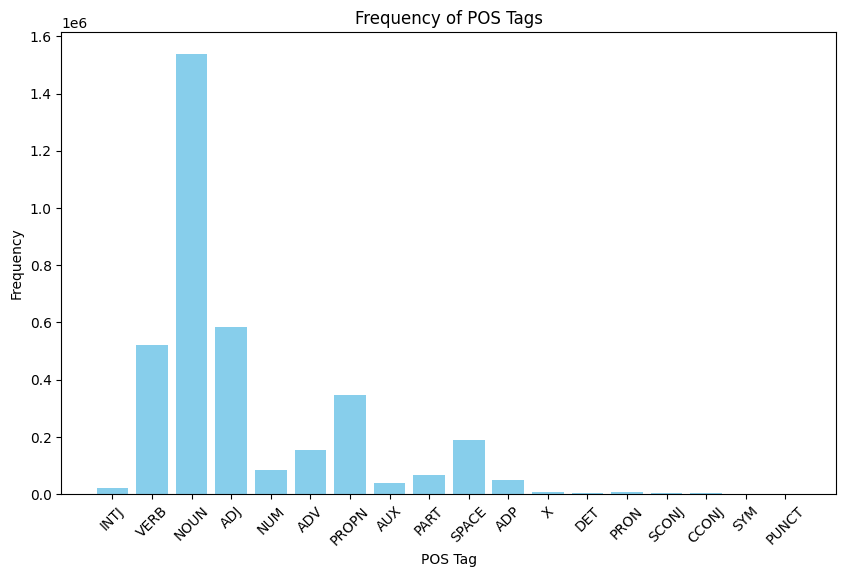

In [46]:
import matplotlib.pyplot as plt

from collections import Counter



# Flatten the list of tags from all rows into a single list

all_tags = [tag for sublist in df['pos_tags'] for tag in sublist]



# Count the frequency of each POS tag

tag_counts = Counter(all_tags)



# Convert the counts to a DataFrame for easy plotting

tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Frequency'])



# Plot the frequencies

plt.figure(figsize=(10, 6))

plt.bar(tag_df['Tag'], tag_df['Frequency'], color='skyblue')

plt.xlabel('POS Tag')

plt.ylabel('Frequency')

plt.title('Frequency of POS Tags')

plt.xticks(rotation=45)

plt.show()

## Named Entity Recognition:

In [ ]:
def ner(text):

    if pd.isnull(text):  

        return np.nan

    doc = nlp(text)

    ner = [(ent.text,ent.label_) for ent in doc.ents]

    return ner

In [37]:
def nertg(text):

    if pd.isnull(text):  

        return np.nan

    txt=[]

    label=[]

    pt=ner(text)

    for x,y in pt:

        txt.append(x)

        label.append(y)

    return txt,label

In [47]:
df[['Entity_list', 'ner_label']] = df['Text'].apply(lambda x: pd.Series(nertg(x)))

In [ ]:
df.to_csv("processed_reviews.csv", index=False)

In [ ]:
df.sample(5)

## Sentiment Analysis

In [ ]:
df['procd_Text']=df['procd_Text'].apply(remove_digits)

In [ ]:
df['train_on'] = df.apply(lambda row: ' '.join(

    word for word in row['Text_list'] if word.lower() not in [entity.lower() for entity in row['Entity_list']]

), axis=1)

In [ ]:
df.to_csv("processed_reviews.csv", index=False)

In [ ]:
df.sample(5)

In [2]:
df=pd.read_csv("processed_reviews.csv")

In [3]:
df.sample(5)

,Score,Summary,Text,sentiment,target,procd_Summary,procd_Text,Text_list,pos_tags,Entity_list,ner_label,train_on
14794,1,Not even close,I bought this stuff from ThinkGeek I didnt kn...,negative,-1,not even close,buy stuff thinkgeek not know sell nowi love ...,"['buy', 'stuff', 'thinkgeek', ' ', 'not', 'kn...","['VERB', 'NOUN', 'ADJ', 'SPACE', 'PART', 'VERB...","['ThinkGeek', 'nowI', 'two', '90', 'second', '...","['GPE', 'PERSON', 'CARDINAL', 'CARDINAL', 'ORD...",buy stuff not know sell love bacon love hot...
11363,1,Not as advertised,I bought Real Lime Real Lemon based on their ...,negative,-1,not as advertised,buy real lime real lemon base claim tsp equ...,"['buy', 'real', 'lime', ' ', 'real', 'lemon',...","['VERB', 'ADJ', 'NOUN', 'SPACE', 'ADJ', 'NOUN'...","['14', '1 Tbsp', '12', '1 Tbsp', 'Keep']","['CARDINAL', 'WORK_OF_ART', 'CARDINAL', 'WORK_...",buy real lime real lemon base claim tsp equ...
57103,5,Awesome treat,I am a teacher and I buy the 72 bag pack for m...,positive,1,awesome treat,teacher buy bag pack student reward kid lov...,"['teacher', 'buy', '72', 'bag', 'pack', 'stude...","['NOUN', 'VERB', 'NUM', 'NOUN', 'NOUN', 'NOUN'...",['72'],['CARDINAL'],teacher buy bag pack student reward kid lov...
38403,1,Beware peanut allergy,I love ThinkThin bars but just a warning here ...,negative,-1,beware peanut allergy,love thinkthin bar warning s clear marking fla...,"['love', 'thinkthin', 'bar', 'warning', 's', '...","['VERB', 'PROPN', 'NOUN', 'VERB', 'X', 'ADJ', ...",['ThinkThin'],['ORG'],love bar warning s clear marking flavor indica...
87488,2,"Bad ""good by"" date",AMAZON ORDER Ordered the 3 pack Verona after r...,negative,-1,bad good by date,amazon order order pack verona read review ...,"['amazon', 'order', 'order', '3', 'pack', 'ver...","['PROPN', 'PROPN', 'NOUN', 'NUM', 'NOUN', 'NOU...","['AMAZON ORDER Ordered', '3', 'Verona', 'onlin...","['ORG', 'CARDINAL', 'PERSON', 'ORG', 'PERSON',...",amazon order order pack read review bec wan...


In [17]:
df['procd_Summary']=df['procd_Summary'].fillna("it was ok")

In [19]:
df['procd_Summary'].sample()

85953    thin mints if only
Name: procd_Summary, dtype: object

In [18]:
df.isna().sum()

Score            0
Summary          2
Text             0
sentiment        0
target           0
procd_Summary    0
procd_Text       0
Text_list        0
pos_tags         0
Entity_list      0
ner_label        0
train_on         0
dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC

import joblib

from matplotlib import pyplot as plt

import seaborn as sn

from sklearn.metrics import confusion_matrix

from sklearn.utils import resample

from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer

from sklearn.feature_extraction.text import CountVectorizer

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      5990
           0       0.98      0.98      0.98      5968
           1       0.99      0.99      0.99      5949

    accuracy                           0.99     17907
   macro avg       0.99      0.99      0.99     17907
weighted avg       0.99      0.99      0.99     17907

                                              procd_Text  Score
65366  popcorn delicious picture mislead rainbow popc...      4
23325  hardly qualify call food   tasteless odorless ...      1
84476  not try steel cut oatmeal compare regular oatm...      3
31837  little light costco espresso blend  shot espre...      3
46569              pg tip absolutely good tea money pond      5 65366    1
23325   -1
84476    0
31837    0
46569    1
Name: target, dtype: int64 [ 1 -1  0  0  1]


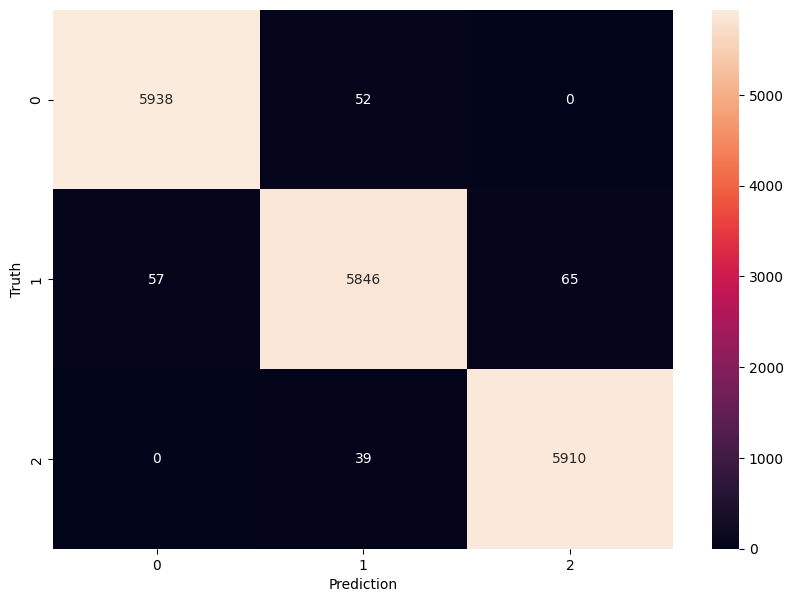

In [48]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(

    df[['procd_Text','Score']],

    df['target'],

    test_size=0.2,

    random_state=42

)



# Defining the column transformer to handle different types of features

preprocessor = ColumnTransformer(

    transformers=[

        ('tfidf', TfidfVectorizer(ngram_range=(1, 3)), 'procd_Text'),  # Apply TF-IDF to 'procd_Text'

    ],

    remainder='passthrough'  # Leave 'Score' and other columns as is

)



# Create a pipeline with preprocessing and the classifier

pipeline = Pipeline([

    ('preprocessor', preprocessor),

    ('classifier', LinearSVC())

])



# Train the model

pipeline.fit(X_train, y_train)



# Make predictions

y_pred = pipeline.predict(X_test)



# Print classification report

print(classification_report(y_test, y_pred, zero_division=0))



# Display a few test predictions

print(X_test[:5], y_test[:5], y_pred[:5])



# Confusion matrix and heatmap

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))

sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Prediction')

plt.ylabel('Truth')

plt.show()

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      5990
           0       0.98      0.98      0.98      5968
           1       0.99      0.99      0.99      5949

    accuracy                           0.99     17907
   macro avg       0.99      0.99      0.99     17907
weighted avg       0.99      0.99      0.99     17907

       Score                                           train_on
65366      4  popcorn delicious picture mislead rainbow popc...
23325      1  hardly qualify call food    tasteless odorless...
84476      3  not try steel cut oatmeal compare regular oatm...
31837      3  little light costco espresso blend shot espres...
46569      5              pg tip absolutely good tea money pond 65366    1
23325   -1
84476    0
31837    0
46569    1
Name: target, dtype: int64 [ 1 -1  0  0  1]


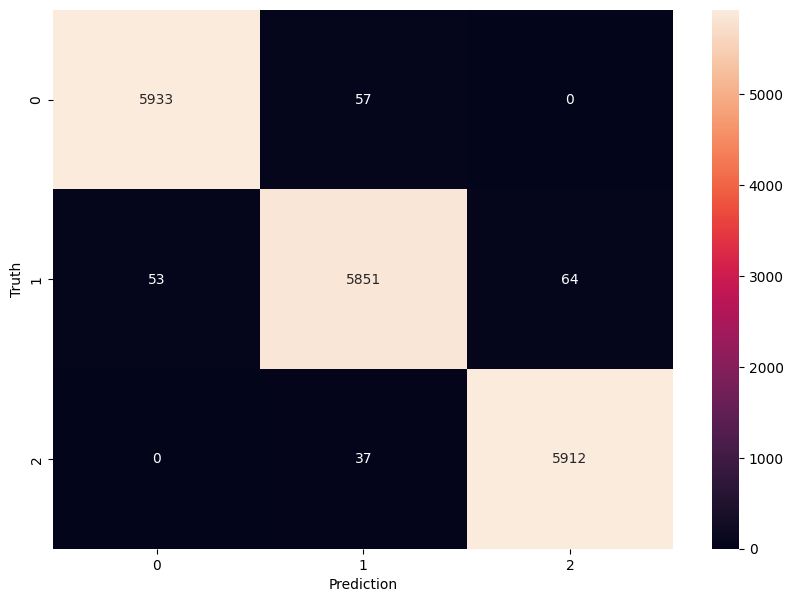

In [50]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(

    df[['Score','train_on']],

    df['target'],

    test_size=0.2,

    random_state=42

)



# Defining the column transformer to handle different types of features

preprocessor = ColumnTransformer(

    transformers=[

        ('tfidf_train_on', TfidfVectorizer(ngram_range=(1, 3)), 'train_on')

    ],

    remainder='passthrough'  # Leave 'Score' and other columns as is

)



# Create a pipeline with preprocessing and the classifier

pipeline = Pipeline([

    ('preprocessor', preprocessor),

    ('classifier', LinearSVC())

])



# Train the model

pipeline.fit(X_train, y_train)



# Make predictions

y_pred = pipeline.predict(X_test)



# Print classification report

print(classification_report(y_test, y_pred, zero_division=0))



# Display a few test predictions

print(X_test[:5], y_test[:5], y_pred[:5])



# Confusion matrix and heatmap

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))

sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Prediction')

plt.ylabel('Truth')

plt.show()

In [54]:
# Defining the column transformer to handle different types of features

preprocessor = ColumnTransformer(

    transformers=[

        ('tfidf', TfidfVectorizer(ngram_range=(1, 3)), 'procd_Text'),  # Apply TF-IDF to 'procd_Text'

    ],

    remainder='passthrough'  # Leave 'Score' and other columns as is

)



# Create a pipeline with preprocessing and the classifier

pipeline = Pipeline([

    ('preprocessor', preprocessor),

    ('classifier', LinearSVC())

])





# Train the model on whole dataset

pipeline.fit(df[['procd_Text','Score']], df['target'])

joblib.dump(pipeline, "text_sentiment.joblib")

['text_sentiment.joblib']

## Text Classification

In [58]:
import joblib



# Load the saved model from the file

loaded_pipeline = joblib.load("text_sentiment.joblib")



# Preprocess the new data

new_data = ["this product was great", "this product was ok", "this product was worst"]

scores = [5, 3, 1]  # Example scores corresponding to each text entry



# Preprocess the new text (using your custom 'preprocesswithlema' function) 

a = preprocesswithlema(new_data[0])

b = preprocesswithlema(new_data[1]) # assuming it is lowercased with no numerical values in it and complete free from html and url

c = preprocesswithlema(new_data[2])

new_data = [a, b,c]  # Processed text data



# Combine the processed text and score for prediction

new_data_combined = pd.DataFrame({'procd_Text':new_data, 'Score':scores})  # Combine the text and corresponding scores



# Use the loaded model to make predictions on the new data

predictions = loaded_pipeline.predict(new_data_combined)



# Map predictions to category names

dictionary = {0: 'neutral', 1: 'positive', -1: 'negative'}



# Print predictions

for i, prediction in enumerate(predictions):

    print(f"Prediction for '{new_data[i]}', Score: {scores[i]}: {dictionary[prediction]}")


Prediction for 'product great', Score: 5: positive
Prediction for 'product ok', Score: 3: neutral
Prediction for 'product bad', Score: 1: negative


## Information Extraction:

In [59]:
import re



# Example text

text = "Contact John at john.doe@example.com or call 123-456-7890 for more details."



# Regex patterns for email and phone numbers

email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'

phone_pattern = r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b'



# Extract information using regex

emails = re.findall(email_pattern, text)

phones = re.findall(phone_pattern, text)



print("Extracted Emails:", emails)

print("Extracted Phones:", phones)


Extracted Emails: ['john.doe@example.com']
Extracted Phones: ['123-456-7890']


## Text Summarization

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

import numpy as np



# Example text

text = """

Artificial Intelligence (AI) is transforming industries across the world. 

In healthcare, AI is helping doctors diagnose diseases more accurately. 

The potential of AI is vast, but there are challenges like data privacy concerns.

"""



# Preprocess the text

sentences = text.split(".")

vectorizer = TfidfVectorizer(stop_words="english")

tfidf_matrix = vectorizer.fit_transform(sentences)



# Compute similarity matrix

cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)



# Rank sentences based on their similarity

sentence_scores = cosine_similarities.sum(axis=1)

ranked_sentences = [sentences[i] for i in np.argsort(sentence_scores)[::-1]]



# Select top 2 sentences for summarization

summary = " ".join(ranked_sentences[:2])

print("Extractive Summary:", summary)


Extractive Summary: 
Artificial Intelligence (AI) is transforming industries across the world  
In healthcare, AI is helping doctors diagnose diseases more accurately


## Question Answering

In [62]:
print(df['Text'][1],'\n',df['Summary'][1])

I was introduced to this ramen 15 years ago while overseas in the ROK Its a spicy Korean ramen comparable to some of its Thai counterparts but has to be one of the tastiest ramen noodles Ive ever had The quality of Nongshim is superb and I would recommend this product to anyone Add an egg to this noodle soup while its cooking and you got an awesome meal 
 Best Ramen


In [65]:
from transformers import pipeline



# Load pre-trained QA model

qa_model = pipeline("question-answering")



# Example context and question

context = "Artificial Intelligence (AI) is transforming industries like healthcare and finance."

question = "What industries are being transformed by AI?"



# Answer the question

answer = qa_model(question=question, context=context)

print("Answer:", answer['answer'])


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


G:\Sem 7\NLP\Practicals\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Answer: healthcare and finance


In [67]:
from transformers import pipeline



# Load pre-trained QA model

qa_model = pipeline("question-answering")



# Example context and question

context = df['Text'][1]

question = "What is being introduced?"



# Answer the question

answer = qa_model(question=question, context=context)

print("Answer:", answer['answer'])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Answer: a spicy Korean ramen


## Text Generation

In [69]:
from transformers import pipeline



# Load pre-trained GPT-2 model

generator = pipeline("text-generation", model="gpt2")



# Example prompt

prompt = "The future of AI in healthcare is"



# Generate text

generated_text = generator(prompt, max_length=50, num_return_sequences=1)

print("Generated Text:", generated_text[0]['generated_text'])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated Text: The future of AI in healthcare is very exciting, which could be a very bad news for a large share of healthcare. It would be wise to have better communication of health information. People should know that their health information is being stored in various forms.


## Chatbot

In [70]:
def chatbot_response(user_input):

    responses = {

        "hello": "Hi there! How can I help you?",

        "how are you": "I'm just a bot, but I'm doing great!",

        "bye": "Goodbye! Have a nice day!"

    }

    return responses.get(user_input.lower(), "Sorry, I didn't understand that.")



# Example conversation

user_input = "Hello"

print("Bot:", chatbot_response(user_input))



user_input = "How are you?"

print("Bot:", chatbot_response(user_input))



user_input = "Bye"

print("Bot:", chatbot_response(user_input))

Bot: Hi there! How can I help you?
Bot: Sorry, I didn't understand that.
Bot: Goodbye! Have a nice day!


## Machine Translation

In [ ]:


from transformers import MBartForConditionalGeneration, MBart50TokenizerFast



model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-one-to-many-mmt")



tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-one-to-many-mmt", src_lang="en_XX")



from tkinter import *

from tkinter import ttk



class Root(Tk):

    

    def __init__(self):

        

        super(Root, self).__init__()

        

        self.title("Text Translator")

        self.minsize(5, 5)

        

        self.labelFrame = ttk.LabelFrame(self, text = "SELECT")

        self.labelFrame.grid(column = 0, row = 2, padx = 10, pady = 10)

        

        self.labelFrame2=ttk.LabelFrame(self, text = "SUBMIT")

        self.labelFrame2.grid(column = 0, row = 1, padx = 10, pady = 10)

        self.button()



    def button(self):



        self.button = ttk.Button(self.labelFrame, text = "Select Language To Translate",command = self.Dropdown)

        self.button.grid(column = 0, row = 0)

        

        self.text_area = Text(self, height=5, width=20, font=("",15))

        self.text_area.grid()

        

        self.button2 = ttk.Button(self.labelFrame2, text = "Enter Text To Translate",command = self.Input)

        self.button2.grid(column = 3, row = 5)



        self.output_area = Text(self, height=5, width=20, font=("", 15))

        self.output_area.grid()



    def Dropdown(self):

        

        self.language_var = StringVar()

        self.language_dropdown = ttk.Combobox(self.labelFrame, textvariable=self.language_var)

        self.language_dropdown['values'] = ["hi_IN", "ta_IN"]

        self.language_dropdown.grid(column=0, row=1)

        

    def Input(self):



        global article_en

        article_en = self.text_area.get("1.0", "end-1c")

    

        #print(self.language_var.get())

        model_inputs = tokenizer(article_en, return_tensors="pt")



        generated_tokens = model.generate(

            **model_inputs,

            forced_bos_token_id=tokenizer.lang_code_to_id[self.language_var.get()]

        )

        translation = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

        

        self.output_area.delete("1.0", "end-1c")

        self.output_area.insert(END, translation[0])

       

root = Root()

root.mainloop()


>>>>>>>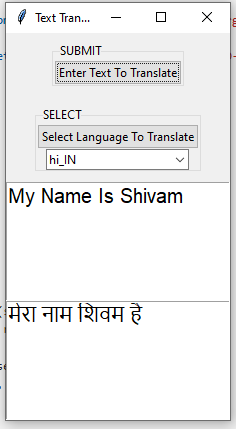

## Custom MT Model

In [18]:
import os

import sys

import transformers

import tensorflow as tf

from datasets import load_dataset

from transformers import AutoTokenizer

from transformers import TFAutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

from transformers import AdamWeightDecay

from transformers import AutoTokenizer, TFAutoModelForSeq2SeqLM

In [19]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-hi"

In [20]:
raw_datasets = load_dataset("cfilt/iitb-english-hindi")

In [21]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 1659083
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 520
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2507
    })
})

In [22]:
raw_datasets['train'][1]

{'translation': {'en': 'Accerciser Accessibility Explorer',
  'hi': 'एक्सेर्साइसर पहुंचनीयता अन्वेषक'}}

In [23]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [24]:
tokenizer("Hello, this is a sentence!")

{'input_ids': [12110, 2, 90, 23, 19, 8800, 61, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [25]:
tokenizer(["Hello, this is a sentence!", "This is another sentence."])

{'input_ids': [[12110, 2, 90, 23, 19, 8800, 61, 0], [239, 23, 414, 8800, 3, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [26]:
with tokenizer.as_target_tokenizer():

    print(tokenizer(["एक्सेर्साइसर पहुंचनीयता अन्वेषक"]))

{'input_ids': [[26618, 16155, 346, 33383, 0]], 'attention_mask': [[1, 1, 1, 1, 1]]}


In [27]:
max_input_length = 128

max_target_length = 128



source_lang = "en"

target_lang = "hi"





def preprocess_function(examples):

    inputs = [ex[source_lang] for ex in examples["translation"]]

    targets = [ex[target_lang] for ex in examples["translation"]]

    model_inputs = tokenizer(inputs, max_length=max_input_length, truncation=True)



    # Setup the tokenizer for targets

    with tokenizer.as_target_tokenizer():

        labels = tokenizer(targets, max_length=max_target_length, truncation=True)



    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

In [28]:
preprocess_function(raw_datasets["train"][:2])

{'input_ids': [[3872, 85, 2501, 132, 15441, 36398, 0], [32643, 28541, 36253, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1]], 'labels': [[63, 2025, 18, 16155, 346, 20311, 24, 2279, 679, 0], [26618, 16155, 346, 33383, 0]]}

In [29]:
tokenized_datasets = raw_datasets.map(preprocess_function, batched=True)

Map:   0%|          | 0/1659083 [00:00<?, ? examples/s]

Map:   0%|          | 0/520 [00:00<?, ? examples/s]

Map:   0%|          | 0/2507 [00:00<?, ? examples/s]

In [30]:
model = TFAutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

tf_model.h5:   0%|          | 0.00/306M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-en-hi.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [31]:
batch_size = 16

learning_rate = 2e-5

weight_decay = 0.01

num_train_epochs = 10

In [32]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf")

In [33]:
generation_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf", pad_to_multiple_of=128)

In [34]:
train_dataset = model.prepare_tf_dataset(

    tokenized_datasets["test"],

    batch_size=batch_size,

    shuffle=True,

    collate_fn=data_collator,

)

In [35]:
validation_dataset = model.prepare_tf_dataset(

    tokenized_datasets["validation"],

    batch_size=batch_size,

    shuffle=False,

    collate_fn=data_collator,

)

In [36]:
generation_dataset = model.prepare_tf_dataset(

    tokenized_datasets["validation"],

    batch_size=8,

    shuffle=False,

    collate_fn=generation_data_collator,

)

In [37]:
optimizer = AdamWeightDecay(learning_rate=learning_rate, weight_decay_rate=weight_decay)

model.compile(optimizer=optimizer)

Epoch 1/10
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
156/156 [==============================] - 161s 386ms/step - loss: 3.7664 - val_loss: 3.9524
Epoch 2/10
156/156 [==============================] - 43s 277ms/step - loss: 3.3160 - val_loss: 3.8657
Epoch 3/10
156/156 [==============================] - 44s 282ms/step - loss: 3.0182 - val_loss: 3.8285
Epoch 4/10
156/156 [==============================] - 44s 284ms/step - loss: 2.7854 - val_loss: 3.8127
Epoch 5/10
156/156 [==============================] - 44s 279ms/step - loss: 2.5626 - val_loss: 3.8156
Epoch 6/10
156/156 [==============================] - 44s 280ms/step - loss: 2.3769 - val_loss: 3.8223
Epoch 7/10
156/156 [==============================] - 44s 281ms/step - loss: 2.2113 - val_loss: 3.8406
Epoch 8/10
156/156 [==============================] - 44s 279ms/step - loss: 2.0571 - val_loss: 3.8510
Epoch 9/10
156/156 [=================

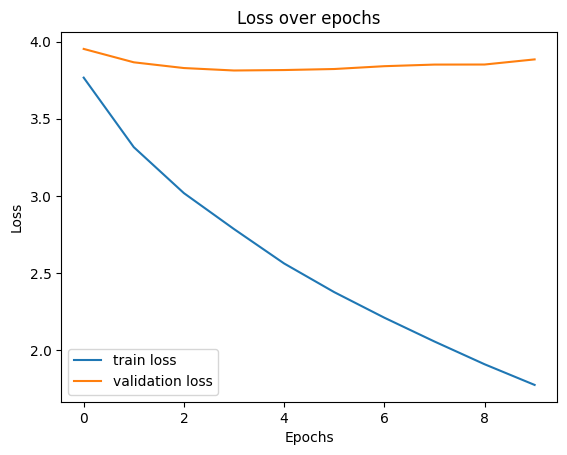

In [38]:
# Train the model and save the training history

history = model.fit(train_dataset, validation_data=validation_dataset, epochs=num_train_epochs)



# To access the full history

print(history.history)



# Optionally, to plot the training and validation metrics

import matplotlib.pyplot as plt



# Plot training & validation loss

plt.plot(history.history['loss'], label='train loss')

plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Loss over epochs')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()



# Plot training & validation accuracy (if available)

if 'accuracy' in history.history:

    plt.figure()

    plt.plot(history.history['accuracy'], label='train accuracy')

    plt.plot(history.history['val_accuracy'], label='validation accuracy')

    plt.title('Accuracy over epochs')

    plt.xlabel('Epochs')

    plt.ylabel('Accuracy')

    plt.legend()



plt.show()

In [39]:
from transformers import GenerationConfig



# Step 1: Create and save generation parameters separately

generation_config = GenerationConfig(

    max_length=512,

    num_beams=4,

    bad_words_ids=[[61949]]

)

generation_config.save_pretrained("/kaggle/working/model")



# Step 2: Remove generation parameters from model config using hasattr and delattr

for param in ['max_length', 'num_beams', 'bad_words_ids']:

    if hasattr(model.config, param):

        delattr(model.config, param)



# Step 3: Now save the model without the generation parameters

model.save_pretrained("/kaggle/working/model")

In [40]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

model = TFAutoModelForSeq2SeqLM.from_pretrained("/kaggle/working/model")

/opt/conda/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at /kaggle/working/model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


In [41]:
input_text  = """It is reported that his birth was due to the bidding of the gods. 

Vishnu gives King Dasharatha a pot of nectar after being summoned by fire. 

The pot of nectar is fed to Queen Kausalya, who then gives birth to Rama."""



tokenized = tokenizer([input_text], return_tensors='np')

out = model.generate(**tokenized, max_length=128)

print(out)

tf.Tensor(
[[61949  2068    78   115     5    25   113  2695     6   417  5042     6
   1956     6  1640    33   125    40    88 11475  3561    37   473 14732
    260  5594  5594   448    18   812    11  4628  1209   416     6  1789
     44 32308   718     5    40 12558    24 19545  8375   697  2959    18
  18455   153     5     2    41    25 14210    18  2695   355     5    40
      0 61949 61949]], shape=(1, 63), dtype=int32)


In [42]:
with tokenizer.as_target_tokenizer():

    print(tokenizer.decode(out[0], skip_special_tokens=True))

रिपोर्ट किया गया है कि उसके जन्म के कारण देवताओं के आदेश के आधार पर थे। वेंदू ने राजा ओसाथथना को आग में बुलाये जाने के पश्चात गिरवी रखा है। रस का लीटर रानी कसा को खिला रहा है, जो कि राम को जन्म देता है।


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:4117: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


## MT Evaluation

In [43]:
print(tokenized_datasets["validation"][0])

{'translation': {'en': 'Students of the Dattatreya city Municipal corporation secondary school demonstrated their imagination power by creating the fictitious fort "Duttgarh".', 'hi': "महानगर पालिका अंतर्गत दत्तात्रय नगर माध्यमिक स्कूल के विद्यार्थियों ने काल्पनिक किला 'दत्तगढ़' बनाकर अपनी कल्पनाशक्ति का परिचय दिया।"}, 'input_ids': [8089, 8, 4, 16826, 21235, 142, 661, 15908, 949, 12111, 19561, 9646, 916, 34734, 20470, 2108, 8885, 77, 17274, 763, 97, 6480, 4, 53372, 34, 142, 83, 687, 5082, 142, 11695, 2326, 1842, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': [25359, 13400, 11409, 15772, 2448, 31545, 8469, 1321, 1409, 49935, 2055, 6, 5909, 37, 22976, 21307, 256, 3130, 14917, 48102, 70, 2385, 143, 4712, 13454, 24, 11160, 139, 40, 0]}


### BLEU Score

In [44]:
pip install sacrebleu -q

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [45]:
import sacrebleu

from tqdm import tqdm



def evaluate_bleu(model, tokenizer, validation_dataset, source_lang, target_lang):

    predictions = []

    references = []



    # Iterate through validation dataset

    for example in tqdm(validation_dataset):

        input_text = example["translation"]["en"]  # Original text in English

        reference = example["translation"]["hi"]   # Target translation in Hindi



        # Tokenize input and generate prediction

        input_ids = tokenizer(input_text, return_tensors="tf", padding=True, truncation=True, max_length=128)

        outputs = model.generate(input_ids["input_ids"], max_length=128)

        predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)



        predictions.append(predicted_text)

        references.append([reference])  # Reference should be a list



    # Compute BLEU score

    bleu_score = sacrebleu.corpus_bleu(predictions, references)

    print(f"BLEU score: {bleu_score.score}")

    return bleu_score.score



# Example usage:

bleu_score = evaluate_bleu(model, tokenizer, tokenized_datasets["validation"], source_lang="en", target_lang="hi")

100%|██████████| 520/520 [1:01:01<00:00,  7.04s/it]

BLEU score: 9.866352341267074


### ROGUE Score

In [46]:
pip install rouge-score -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from rouge_score import rouge_scorer



def evaluate_rouge(model, tokenizer, validation_dataset, source_lang, target_lang):

    scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

    rouge_scores = {"rouge1": [], "rouge2": [], "rougeL": []}



    # Iterate through validation dataset

    for example in tqdm(validation_dataset):

        input_text = example["translation"][source_lang]  # Original text in source language

        reference = example["translation"][target_lang]   # Target translation



        # Tokenize input and generate prediction

        input_ids = tokenizer(input_text, return_tensors="tf", padding=True, truncation=True, max_length=128)

        outputs = model.generate(input_ids["input_ids"], max_length=128)

        predicted_text = tokenizer.decode(outputs[0], skip_special_tokens=True)



        # Calculate ROUGE scores

        score = scorer.score(reference, predicted_text)

        for key in score:

            rouge_scores[key].append(score[key].fmeasure)



    # Calculate average ROUGE scores

    for key in rouge_scores:

        avg_score = sum(rouge_scores[key]) / len(rouge_scores[key])

        print(f"Average {key} score: {avg_score}")

    return rouge_scores



# Example usage:

rouge_scores = evaluate_rouge(model, tokenizer, tokenized_datasets["validation"], source_lang="en", target_lang="hi")


 48%|████▊     | 250/520 [29:04<32:10,  7.15s/it]  